<a href="https://colab.research.google.com/github/vvrgit/ML-Models-and-Applications/blob/main/PolynomialRegression_AITrack_SampleData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Polynomial Regression Model

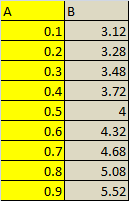

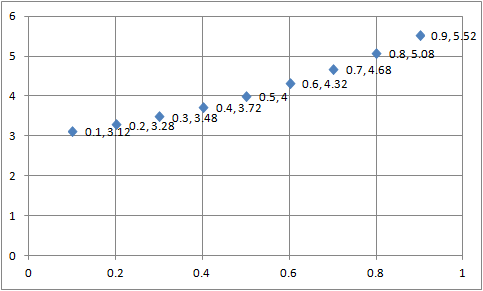

#Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Libraries

In [2]:
import numpy as np
import math as mt
import random
import pandas as pd

#Import Data

In [3]:
data = pd.read_csv('/content/drive/MyDrive/AI Data/sampledata_03.csv')
data.head()

,A,B
0,0.1,3.12
1,0.2,3.28
2,0.3,3.48
3,0.4,3.72
4,0.5,4.00


In [4]:
data['A']

,A
0,0.1
1,0.2
2,0.3
3,0.4
4,0.5
5,0.6
6,0.7
7,0.8
8,0.9


# Outliers Detection

In [5]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

In [6]:
sample_outliers_A = detect_outliers_zscore(data['A'])
sample_outliers_B = detect_outliers_zscore(data['B'])
print("Outliers in A column from Z-scores method: ", sample_outliers_A)
print("Outliers in B column from Z-scores method: ", sample_outliers_B)

Outliers in A column from Z-scores method:  []
Outliers in B column from Z-scores method:  []


#Outlier Treatment

In [7]:
from scipy.stats import zscore
zA = np.abs(zscore(data['A']))
zB = np.abs(zscore(data['A']))
data['ZscoreA'] = zA
data['ZscoreB'] = zB
outliers_A=len(data[data['ZscoreA']>3])
outliers_B=len(data[data['ZscoreB']>3])
data_z = data[data['ZscoreA']<3]
data=data_z.drop(['ZscoreA', 'ZscoreB'], axis=1)
data

,A,B
0,0.1,3.12
1,0.2,3.28
2,0.3,3.48
3,0.4,3.72
4,0.5,4.00
5,0.6,4.32
6,0.7,4.68
7,0.8,5.08
8,0.9,5.52


#Missing Values Treatment

In [8]:
print(data.isnull().sum())

A    0
B    0
dtype: int64


In [9]:
m1=data['A'].mean()
m2=data['B'].mean()
data['A'].fillna(value=m1, inplace=True)
data['B'].fillna(value=m2, inplace=True)
data

<ipython-input-9-32640b8cc946>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['A'].fillna(value=m1, inplace=True)
<ipython-input-9-32640b8cc946>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

,A,B
0,0.1,3.12
1,0.2,3.28
2,0.3,3.48
3,0.4,3.72
4,0.5,4.00
5,0.6,4.32
6,0.7,4.68
7,0.8,5.08
8,0.9,5.52


#Data Split

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.A, data.B, test_size = 0.20, random_state = 10)

#Initialization

In [11]:
m1=random.uniform(-10,10)
m2=random.uniform(-10,10)
c=random.uniform(-10,10)
eta=0.01
max_iter=100000

#Gradient Calculation

In [12]:
def gradient(m1,m2,c,x,y):
  m1_deriv=-1*(y-m1*x*x-m2*x-c)*x*x
  m2_deriv=-1*(y-m1*x*x-m2*x-c)*x
  c_deriv=-1*(y-m1*x*x-m2*x-c)
  return m1_deriv,m2_deriv,c_deriv

#Training Using Stochastic Gradient Descent Optimizer

In [13]:
for iter in range(max_iter):
  for sample in range(x_train.shape[0]):
    del_m1,del_m2,del_c=gradient(m1, m2, c, x_train.iloc[sample], y_train.iloc[sample])
    m1=m1-eta*del_m1
    m2=m2-eta*del_m2
    c=c-eta*del_c
print('model parameter m1, m2 and c',m1,m2,c)

model parameter m1, m2 and c 1.9990546276331258 1.0008580168038244 2.9998590108109613


## Model Prediction on Training Data

In [14]:
y_pred_train = []
for i in x_train:
  y_p_tr = (m1 * i*i)+(m2 * i) + c
  y_pred_train.append(y_p_tr)
y_pred_train = np.array(y_pred_train)

## Model Prediction on Testing Data

In [15]:
y_pred_test = []
for i in x_test:
  y_p_te = (m1 * i*i)+(m2 * i) + c
  y_pred_test.append(y_p_te)
y_pred_test = np.array(y_pred_test)

## Error Metrics Calculation

In [16]:

import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


#Training Accuracies
rmse = math.sqrt(mean_squared_error(y_train, y_pred_train))
print('Root mean square error', rmse)
mse = (mean_squared_error(y_train, y_pred_train))
print('Mean square error', mse)
mae=mean_absolute_error(y_train, y_pred_train)
print('Mean absolute error', mae)

Root mean square error 4.501699668271249e-05
Mean square error 2.0265299903313472e-09
Mean absolute error 3.874097404419986e-05


In [17]:
#Testing Accuracies
mse = (mean_squared_error(y_test, y_pred_test))
print('Mean square error', mse)
mse = mt.sqrt(mean_squared_error(y_test, y_pred_test))
print('Root mean square error', mse)
mae=mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error', mae)

Mean square error 9.539437397991585e-09
Root mean square error 9.767004350358191e-05
Mean absolute error 8.29290109269909e-05


In [18]:
x=input("Enter value of input")
estimation=m1*float(x)*float(x)+m2*float(x)+c
print("estimated output:",estimation)

Enter value of input0.2
estimated output: 3.2799927992770512


## Thank You